<a href="https://colab.research.google.com/github/drmuskangarg/MCI2DEM/blob/main/MCItoDem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RS=100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#loading the data
df = pd.read_csv('URL link to dataset')
df1=df

df=df.drop(['Male'], axis=1)
df=df.drop(['AgeVis'], axis=1)
df=df.drop(['FCOGIMPR'], axis=1)
df

In [ ]:
df=df.groupby('CLINIC').first() #For a group of the data collected from the first visit of each participant
df

,EDUC,Any_E4,BDITOT,BAItot,CDRSUM,CDRGLOB,faq_total,PRES_DEL,PRES_HAL,PRES_AGI,...,PRES_APP,DiabetesGS,HypertensionTxGS,DyslipidemiaTxGS,AFibGS,AnginaGS,MIGS,CADGS,StrokeGS,PVDGS
CLINIC,,,,,,,,,,,,,,,,,,,,,
410130,12,0,2,3,2.0,0.5,6,0,0,0,...,0,1,2,1,1,0,0,0,0,0
439822,14,0,2,0,0.5,0.5,1,0,0,0,...,0,0,2,3,1,1,0,1,0,0
500717,13,0,1,1,1.5,0.5,18,0,0,0,...,0,1,2,3,0,1,0,1,1,0
561865,14,0,22,6,4.0,0.5,7,0,0,0,...,0,0,1,1,0,0,0,0,0,0
567974,12,0,6,0,1.0,0.5,4,0,0,0,...,0,0,2,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005957,18,1,0,0,0.5,0.5,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5026667,17,0,6,2,0.5,0.5,0,0,0,0,...,0,0,2,3,0,0,0,0,0,0
5326758,20,0,1,0,0.0,0.0,0,0,0,0,...,0,0,2,3,0,0,0,0,1,0


In [ ]:
tempdf=df.replace([np.inf, -np.inf], 0)
tempdf = tempdf.replace(np.nan, 0)
# df=df.drop(['IncidentMCI'], axis=1)

In [ ]:
#Finding Threshold (Assortativity)

In [ ]:
#calculating the correlation

import networkx as nx
from networkx.algorithms import connected_components
corr = tempdf.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']


T=0.02

for T in range(10,40,1):

    links_filtered=links.loc[ (links['var1'] != links['var2']) ]
    links_filtered1=links_filtered.loc[((links_filtered['value'] > T/100) | (links_filtered['value'] < -(T/100)))]
    print(links_filtered1)
    G=nx.from_pandas_edgelist(links_filtered1, 'var1', 'var2', 'value')
    print("T=", T)
    for c in connected_components(G):
            each=G.subgraph(c)

            print(nx.average_shortest_path_length(each))
            print(nx.degree_assortativity_coefficient(each))
            print(nx.degree_centrality(each))
            print(nx.betweenness_centrality(each))
            print(nx.clustering(each))
            print("********************************")
            print(each.nodes())
    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

# Modularity Detection Mechanism

In [ ]:
#calculating the correlation
import networkx as nx
import itertools
from networkx.algorithms import connected_components
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
from networkx.algorithms.community.centrality import girvan_newman
corr = tempdf.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

links_filtered=links.loc[ (links['var1'] != links['var2']) ]
links_filtered1=links_filtered.loc[((links_filtered['value'] > 0.25) | (links_filtered['value'] < -0.25))]
print(links_filtered1)
G=nx.from_pandas_edgelist(links_filtered1, 'var1', 'var2', 'value')

for c in connected_components(G):
        each=G.subgraph(c)

        print(nx.average_shortest_path_length(each))
        print(nx.degree_assortativity_coefficient(each))
        print(nx.degree_centrality(each))
        print(nx.betweenness_centrality(each))
        abc=nx.clustering(each)
        filtered_vals = [v for _, v in abc.items() if v != 0]
        average = sum(filtered_vals) / len(filtered_vals)
        print("CC", average)
        print(each.nodes())
        comp = girvan_newman(each)
        print('GIRVAN NEWMAN COMMUNITY DETECTION')
        for communities in itertools.islice(comp, 10):
            print(tuple(sorted(c) for c in communities))
            print("______________")
        communities = community.greedy_modularity_communities(each)
        print('MODULARITY COMMUNITY DETECTION')

        modularity_dict = {} # Create a blank dictionary
        for i,com in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
            for name in com: # Loop through each person in a community
                modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.
        print(modularity_dict)
        print("********************************")

    # print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

         var1              var2     value
57     BDITOT            BAItot  0.576856
58     BDITOT            CDRSUM  0.269511
60     BDITOT         faq_total  0.307602
64     BDITOT          PRES_DEP  0.254647
72     BDITOT        DiabetesGS  0.263949
..        ...               ...       ...
645      MIGS             CADGS  0.351789
668     CADGS  DyslipidemiaTxGS  0.412462
670     CADGS          AnginaGS  0.646022
671     CADGS              MIGS  0.351789
695  StrokeGS  DyslipidemiaTxGS  0.268357

[104 rows x 3 columns]
3.13768115942029
0.05330968163570099
{'BDITOT': 0.21739130434782608, 'BAItot': 0.21739130434782608, 'CDRSUM': 0.2608695652173913, 'faq_total': 0.30434782608695654, 'PRES_DEP': 0.2608695652173913, 'DiabetesGS': 0.08695652173913043, 'PRES_HAL': 0.2608695652173913, 'PRES_MOT': 0.34782608695652173, 'PRES_APP': 0.21739130434782608, 'CDRGLOB': 0.08695652173913043, 'PRES_AGI': 0.043478260869565216, 'PRES_APA': 0.3913043478260869, 'PRES_DIS': 0.2608695652173913, 'PRES_DEL': 0

# Modularity



In [ ]:
ddata={'PRES_DIS': 0, 'PRES_ANX': 0, 'PRES_APP': 0, 'BAItot': 0, 'PRES_APA': 0, 'PRES_EUP': 0, 'PRES_HAL': 0, 'PRES_IRR': 0, 'PRES_MOT': 0, 'PRES_DEL': 0, 'CDRSUM': 1, 'BDITOT': 1, 'PRES_AGI': 1, 'DiabetesGS': 1, 'faq_total': 1, 'PRES_DEP': 1, 'CDRGLOB': 1, 'StrokeGS': 2, 'CADGS': 2, 'HypertensionTxGS': 2, 'AnginaGS': 2, 'AFibGS': 2, 'DyslipidemiaTxGS': 2, 'MIGS': 2}

from collections import defaultdict
rdata=defaultdict(list)
for key, val in sorted(ddata.items()):
    rdata[val].append(key)
components=dict(rdata)
# printing result
print(components.values())


dict_values([['AFibGS', 'AnginaGS', 'CADGS', 'DyslipidemiaTxGS', 'HypertensionTxGS', 'MIGS', 'StrokeGS'], ['BAItot', 'PRES_ANX', 'PRES_APA', 'PRES_APP', 'PRES_DEL', 'PRES_DIS', 'PRES_EUP', 'PRES_HAL', 'PRES_IRR', 'PRES_MOT'], ['BDITOT', 'CDRGLOB', 'CDRSUM', 'DiabetesGS', 'PRES_AGI', 'PRES_DEP', 'faq_total']])


In [ ]:
grp=df1.groupby('CLINIC')
keys = grp.groups.keys()
AllPdeltaC1=dict()

flag=0
lst=components[0]
lst.append('FCOGIMPR')
# lst.append('IncidentMCI')
for i in keys:
    # print(grp.get_group(i))'

     if len(grp.get_group(i))>1:
        each_i= grp.get_group(i)

        dfc1=each_i.filter(lst)
        print(dfc1)
        flag=flag+1

print(flag)

ddata={'PRES_DIS': 0, 'PRES_ANX': 0, 'PRES_APP': 0, 'BAItot': 0, 'PRES_APA': 0, 'PRES_EUP': 0, 'PRES_HAL': 0, 'PRES_IRR': 0, 'PRES_MOT': 0, 'PRES_DEL': 0, 'CDRSUM': 1, 'BDITOT': 1, 'PRES_AGI': 1, 'DiabetesGS': 1, 'faq_total': 1, 'PRES_DEP': 1, 'CDRGLOB': 1, 'StrokeGS': 2, 'CADGS': 2, 'HypertensionTxGS': 2, 'AnginaGS': 2, 'AFibGS': 2, 'DyslipidemiaTxGS': 2, 'MIGS': 2}

from collections import defaultdict
rdata=defaultdict(list)
for key, val in sorted(ddata.items()):
    rdata[val].append(key)
components=dict(rdata)
print(components)

grp=df1.groupby('CLINIC')
keys = grp.groups.keys()
AllPdeltaC1=dict()

import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos(a,b):
  # cos_sim = dot(a, b)
  #/(norm(a)*norm(b))

  dist = np.linalg.norm(b - a)
  return dist

x=dict()
y=dict()
label=dict()
for c in range(0, len(components.keys())):
    print('#####################################################################',c)
    tempvar=[]
    flag=0
    lst=components[c]
    tempvar=list(components[c])

    lst.append('FCOGIMPR')
    lst.append('AgeVis')
    xcomp=[]
    ycomp=[]
    labelcomp=[]
    # lst.append('IncidentMCI')
    for i in keys:
        if len(grp.get_group(i))>1:
            each_i= grp.get_group(i)
            dfc1=each_i.filter(lst)
            dfc1.reset_index(inplace=True)
            vector1=each_i.filter(tempvar)
            vector=vector1.to_numpy()
            for j in range(0,len(dfc1)-1):
              agedif=float(dfc1['AgeVis'][j+1])-float(dfc1['AgeVis'][j])
              deltay=int(dfc1['FCOGIMPR'][j+1])
              a=vector[j]
              b=vector[j+1]
              xcomp.append(agedif)
              ycomp.append(cos(a,b))
              labelcomp.append(deltay)
              # print(agedif, deltay, cos(a,b))
            flag=flag+1
    x[c]=xcomp
    y[c]=ycomp
    label[c]=labelcomp

# print(flag)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

for c in range(0, len(components.keys())):
    print(components[c])
    x1 = x[c]
    y1 = y[c]
    label1 = label[c]
    colors = ['green','red']


    fig = plt.figure(figsize=(8,6))
    plt.title("FD: Plot of Distance-Time ratio for Component "+str(c+1))#+" with attributes "+str(components[c]))
    plt.xlabel("Time lapsed (in years)")
    plt.ylabel("Euclidean distance (between attribute vectors) ")
    plt.scatter(x1, y1, c=label[0], cmap=matplotlib.colors.ListedColormap(colors))

    # cb = plt.colorbar()
    plt.savefig('FD_plot'+str(c)+'.pdf')
    loc = np.arange(0,max(label1),max(label1)/float(len(colors)))
    # cb.set_ticks(loc)
    # cb.set_ticklabels(colors)


{0: ['BAItot', 'BDITOT', 'CDRSUM', 'PRES_DEP', 'faq_total'], 1: ['DiabetesGS'], 2: ['PRES_ANX', 'PRES_APA', 'PRES_APP', 'PRES_DEL', 'PRES_DIS', 'PRES_EUP', 'PRES_HAL', 'PRES_IRR', 'PRES_MOT'], 3: ['CDRGLOB'], 4: ['PRES_AGI'], 5: ['AFibGS', 'AnginaGS', 'CADGS', 'DyslipidemiaTxGS', 'MIGS'], 6: ['HypertensionTxGS'], 7: ['StrokeGS']}
##################################################################### 0
##################################################################### 1
##################################################################### 2
##################################################################### 3
##################################################################### 4
##################################################################### 5
##################################################################### 6
##################################################################### 7
['BAItot', 'BDITOT', 'CDRSUM', 'PRES_DEP', 'faq_total', 'FCOGIMPR', 'AgeVis']
{1, 3}
['Diabe

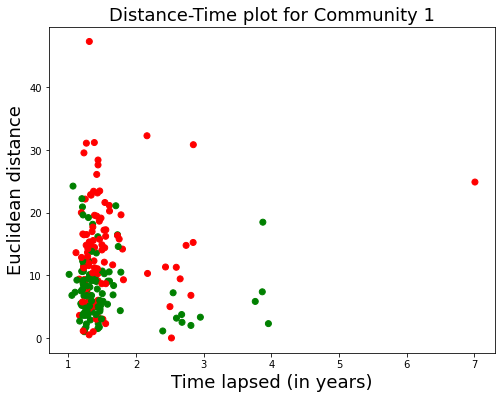

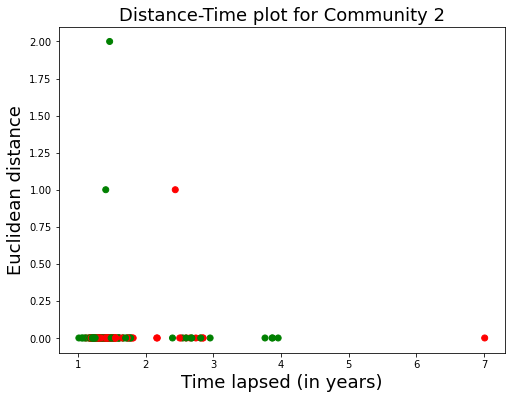

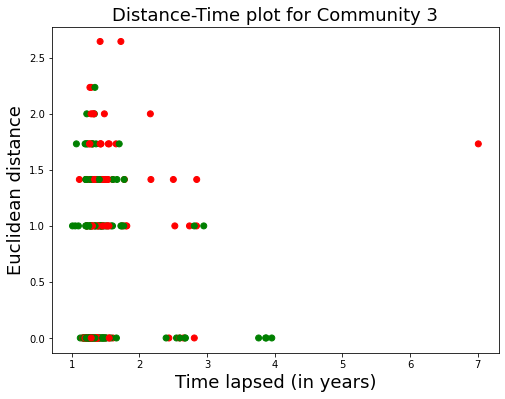

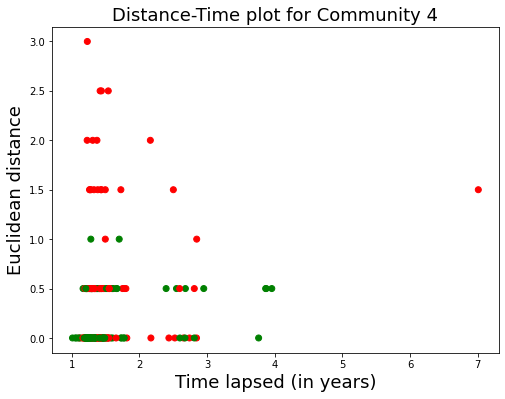

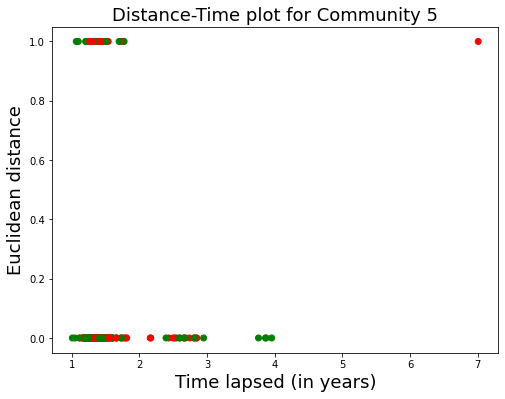

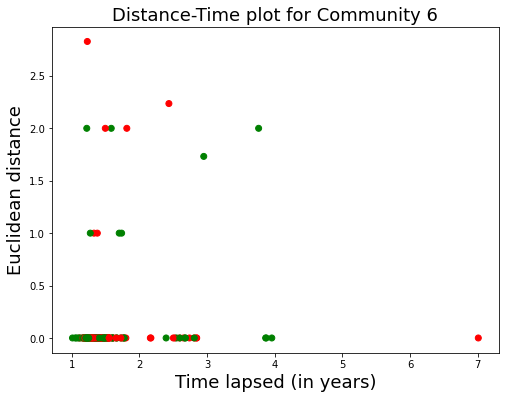

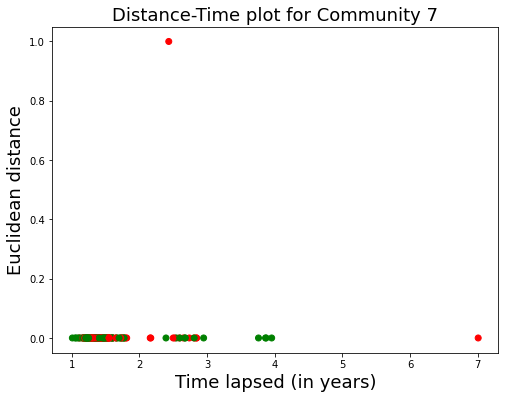

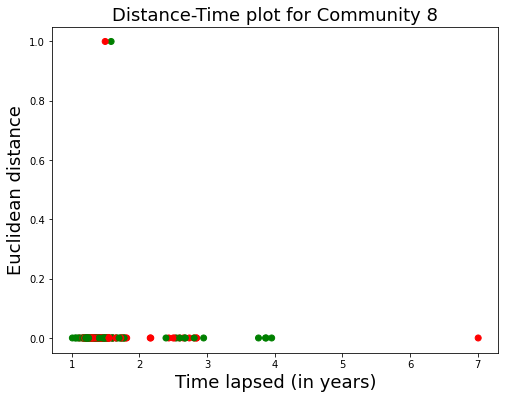

In [ ]:


ddata=[['BAItot', 'BDITOT', 'CDRSUM', 'PRES_DEP', 'faq_total'], ['DiabetesGS'], ['PRES_ANX', 'PRES_APA', 'PRES_APP', 'PRES_DEL', 'PRES_DIS', 'PRES_EUP', 'PRES_HAL', 'PRES_IRR', 'PRES_MOT'], ['CDRGLOB'], ['PRES_AGI'], ['AFibGS', 'AnginaGS', 'CADGS', 'DyslipidemiaTxGS', 'MIGS'], ['HypertensionTxGS'], ['StrokeGS']]
from collections import defaultdict
rdata=defaultdict(list)
flag=0
for val in ddata:
    rdata[flag]=val
    flag=flag+1
components=dict(rdata)\
print(components)

grp=df1.groupby('CLINIC')
keys = grp.groups.keys()
AllPdeltaC1=dict()

import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos(a,b):
  # cos_sim = dot(a, b)
  #/(norm(a)*norm(b))

  dist = np.linalg.norm(b - a)
  return dist

x=dict()
y=dict()
label=dict()
for c in range(0, len(components.keys())):
    print('#####################################################################',c)
    tempvar=[]
    flag=0
    lst=components[c]
    tempvar=list(components[c])

    lst.append('FCOGIMPR')
    lst.append('AgeVis')
    xcomp=[]
    ycomp=[]
    labelcomp=[]
    # lst.append('IncidentMCI')
    for i in keys:
        if len(grp.get_group(i))>1:
            each_i= grp.get_group(i)
            dfc1=each_i.filter(lst)
            dfc1.reset_index(inplace=True)
            vector1=each_i.filter(tempvar)
            vector=vector1.to_numpy()
            for j in range(0,len(dfc1)-1):
              agedif=float(dfc1['AgeVis'][j+1])-float(dfc1['AgeVis'][j])
              deltay=int(dfc1['FCOGIMPR'][j+1])
              a=vector[j]
              b=vector[j+1]
              xcomp.append(agedif)
              ycomp.append(cos(a,b))
              labelcomp.append(deltay)
              # print(agedif, deltay, cos(a,b))
            flag=flag+1
    x[c]=xcomp
    y[c]=ycomp
    label[c]=labelcomp

# print(flag)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

for c in range(0, len(components.keys())):
    print(components[c])
    x1 = x[c]
    y1 = y[c]
    label1 = label[c]
    print(set(label[c]))
    colors = ['green','red']


    fig = plt.figure(figsize=(8,6))
    plt.title("Distance-Time plot for Community "+str(c+1), fontsize=18)#+" with attributes "+str(components[c]), , fontsize=12)
    plt.xlabel("Time lapsed (in years)", fontsize=18)
    plt.ylabel("Euclidean distance", fontsize=18)
    plt.scatter(x1, y1, c=label[0], cmap=matplotlib.colors.ListedColormap(colors))

    # cb = plt.colorbar()
    plt.savefig('FD_Girvan_plot'+str(c+1)+'.jpg')
    loc = np.arange(0,max(label1),max(label1)/float(len(colors)))
    # cb.set_ticks(loc)
    # cb.set_ticklabels(colors)
